# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [60]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math


In [5]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [19]:
totalapplicants = data['race'].count
black_applicants = data['race']=='b'
white_applicants = data['race']=='w'

print("Number of Black Applicants:", np.sum(black_applicants))
print("Number of White Applicants:", np.sum(white_applicants))
print("Total Applicants:", 4870)


Number of Black Applicants: 2435
Number of White Applicants: 2435
Total Applicants: 4870


In [76]:
# number of callbacks for black-sounding names
print("Calls for White Sounding Names:", sum(data[data.race=='w'].call))
print("Calls for Black Sounding Names:", sum(data[data.race=='b'].call))

print("Call Mean - White:", round(np.mean(data[data.race=='w'].call), 3))
print("Call Mean - Black:", round(np.mean(data[data.race=='b'].call), 3))

print("empirical_diff_means:", round(empirical_diff_means,3))


Calls for White Sounding Names: 235.0
Calls for Black Sounding Names: 157.0
Call Mean - White: 0.097
Call Mean - Black: 0.064
empirical_diff_means: 0.032


In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>1.  What test is approriate for this problem?  The difference of means is an appropriate test statistic.</p>
    <p>2.  What are the null and alternate hypotheses?  The <b>null hypothesis</b> is that there is no difference between the number of calls received for resumes from applicants with black sounding sames as for those with white sounding names.  The <b>alternative hypothesis</b> is that applicants with black sounding names received calls at a lower rate.</p>
</div>

In [33]:
w = data[data.race=='w'].call
b = data[data.race=='b'].call

In [78]:
#Bootstrap replication
bs_replicates_w = np.empty(10000)
bs_replicates_b = np.empty(10000)

def bootstrap_replicate_id(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

for i in range(10000):
    bs_replicates_w[i] = bootstrap_replicate_id(w, np.mean)
    
for i in range(10000):
    bs_replicates_b[i] = bootstrap_replicate_id(b, np.mean)


p = np.sum(bs_replicates_b >= bs_replicates_w)/len(bs_replicates)

print("p = ", p)

p =  0.0


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>

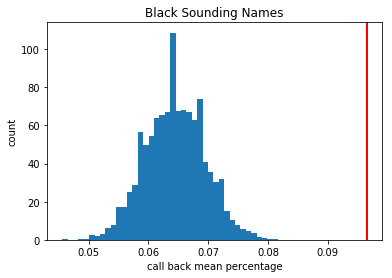

In [53]:
_ = plt.hist(bs_replicates_b,normed = True, bins = 40)
_ = plt.xlabel("call back mean percentage")
_ = plt.ylabel("count")
_ = plt.title("Black Sounding Names")
_ = plt.axvline(np.mean(data[data.race=='w'].call), color='r', linestyle='solid', linewidth=2, label="White Call Mean")
plt.show()

In [79]:
#Margin of Error: 2 x Standard Error
StandardError = round(math.sqrt((np.mean(bs_replicates_b)) * (1-np.mean(bs_replicates_b))/10000),3)
ConfidenceIntervals = np.percentile(bs_replicates_b, [2.5, 97.5])
print("Average call rate for Black Names =", round(np.mean(bs_replicates_b), 3))
print("Standard Error:", StandardError)
print("Margin of Error:", 2*StandardError)
print("Confidence Intervals [2.5%, 97.5%]:", ConfidenceIntervals)
print("p value:", p)

Average call rate for Black Names = 0.065
Standard Error: 0.002
Margin of Error: 0.004
Confidence Intervals [2.5%, 97.5%]: [0.05462012 0.07474332]
p value: 0.0
